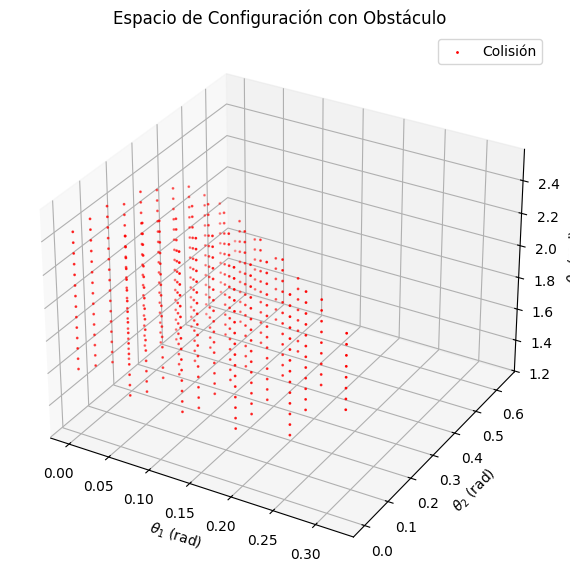

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definición de parámetros del robot
l1, l2, l3 = 1.0, 1.0, 1.0  # Longitudes de los links
theta1_range = np.linspace(0, np.pi, 50)
theta2_range = np.linspace(0, np.pi, 50)
theta3_range = np.linspace(0, np.pi, 50)

# Definir el obstáculo en el espacio de trabajo
xo, yo = 1.5, 1.0  # Centro del obstáculo
ro = 0.5           # Radio del obstáculo

# Lista para almacenar configuraciones inválidas
collisions = []

# Evaluación del C-space
for i, theta1 in enumerate(theta1_range):
    for j, theta2 in enumerate(theta2_range):
        for k, theta3 in enumerate(theta3_range):
            # Posición del actuador final
            x = l1 * np.cos(theta1) + l2 * np.cos(theta1 + theta2) + l3 * np.cos(theta1 + theta2 + theta3)
            y = l1 * np.sin(theta1) + l2 * np.sin(theta1 + theta2) + l3 * np.sin(theta1 + theta2 + theta3)

            # Verificar si está dentro del obstáculo
            if (x - xo)**2 + (y - yo)**2 <= ro**2:
                collisions.append([theta1, theta2, theta3])

# Convertir a numpy array
collisions = np.array(collisions)

# Graficar el espacio de configuración en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(collisions[:, 0], collisions[:, 1], collisions[:, 2], c='red', s=1, label='Colisión')

# Etiquetas y título
ax.set_xlabel(r'$\theta_1$ (rad)')
ax.set_ylabel(r'$\theta_2$ (rad)')
ax.set_zlabel(r'$\theta_3$ (rad)')
ax.set_title('Espacio de Configuración con Obstáculo')
ax.legend()

plt.show()
